In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D,Flatten,Dense

In [2]:

DATASET_FOLDER = "../input/plantvillage-dataset/color"
IMG_SIZE = (200,200)
BATCH_SIZE = 64
generator = ImageDataGenerator(
    rescale = 1./255., 
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.33
)

train_dataset = generator.flow_from_directory(DATASET_FOLDER,subset="training",target_size=IMG_SIZE,batch_size=64)
test_dataset = generator.flow_from_directory(DATASET_FOLDER,subset="validation",target_size=IMG_SIZE,batch_size=64)

Found 36401 images belonging to 38 classes.
Found 17904 images belonging to 38 classes.


In [3]:
labels = {v:k for k,v in train_dataset.class_indices.items() }
print("Indices and Corresponsing Labels")
print(labels)

Indices and Corresponsing Labels
{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30

In [4]:
def build_model():
    input_layer = tf.keras.Input(shape=(200,200,3)) 
    model = Xception(
        include_top=False,
        weights="imagenet",
        input_shape=(200,200,3),
        pooling="max"
    )
    model.trainable=False
    model = model(input_layer)
    flatten_layer = Flatten()(model)
    output_layer = Dense(38,activation="softmax")(flatten_layer)
    model = tf.keras.Model(input_layer,output_layer)
    model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"]
        ,)
    model.summary()
    return model

In [5]:
model = build_model()

2022-01-21 10:20:03.834812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 10:20:03.944071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 10:20:03.944758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 10:20:03.945941: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                77862     
Total params: 20,939,342
Trainable params: 77,862
Non-trainable params: 20,861,480
_________________________________________________________________


In [6]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset,batch_size=BATCH_SIZE)

2022-01-21 10:20:09.060713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-21 10:20:13.017121: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


569/569 [==============================] - 788s 1s/step - loss: 0.8744 - categorical_accuracy: 0.7486 - val_loss: 0.5330 - val_categorical_accuracy: 0.8363
Epoch 2/10
569/569 [==============================] - 554s 974ms/step - loss: 0.4942 - categorical_accuracy: 0.8465 - val_loss: 0.4388 - val_categorical_accuracy: 0.8637
Epoch 3/10
569/569 [==============================] - 557s 979ms/step - loss: 0.4213 - categorical_accuracy: 0.8667 - val_loss: 0.4397 - val_categorical_accuracy: 0.8647
Epoch 4/10
569/569 [==============================] - 554s 973ms/step - loss: 0.3994 - categorical_accuracy: 0.8740 - val_loss: 0.4021 - val_categorical_accuracy: 0.8739
Epoch 5/10
569/569 [==============================] - 554s 975ms/step - loss: 0.3699 - categorical_accuracy: 0.8829 - val_loss: 0.3939 - val_categorical_accuracy: 0.8775
Epoch 6/10
569/569 [==============================] - 555s 975ms/step - loss: 0.3598 - categorical_accuracy: 0.8862 - val_loss: 0.3811 - val_categorical_accuracy: 0

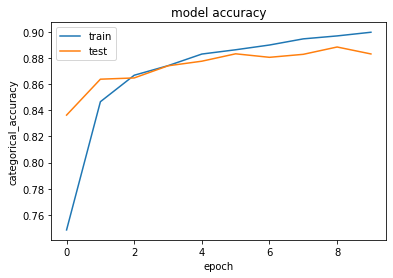

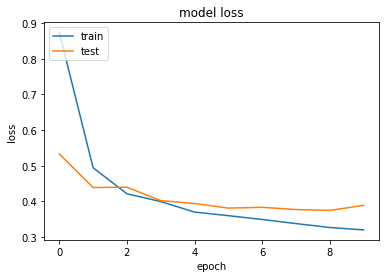

In [7]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.save("disease_prediction_model")

2022-01-21 11:57:46.514987: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [9]:
import shutil
shutil.make_archive("model", 'zip', "disease_prediction_model")

'/kaggle/working/model.zip'